## Analyzing Important Frequency, Time and Channel
#### Work To Continue
In order to improve analyses, I was thinking of looking at a couple of things:
1. A 500 ms window of evolving brain state (e.g. 7x1 feature vector) for all channels for a certain word pair match vs. another one vs. a similar word. For example BRICK/GLASS vs. BRICK/PANTS vs. JUICE/PANTS.
2. Channel-wide ANOVA done on all frequency/time bins for each word match pair 
3. Working on getting cluster statistic working for within subject analysis of all channels

To Do:
[x] First: For every 1431 events -> divide into the 12 groups (not averaging across events) -> word pair A, where does it lie in the 96,7 dimensional space (concatenating instead of averaging across channels)

[] Second: Electrode 
raw data = channels and frequency bands identify first n PC for each wordpair and then compute distance

[x] Third: ANOVA to reduce dimensionality

later: averaging later, and compare distributions instead of the electrodes between 

In [1]:
# Import Necessary Libraries
import numpy as np
import os, csv, json
import math
import random

import matplotlib
from matplotlib import *
from matplotlib import pyplot as plt

import scipy.io
from sklearn.decomposition import PCA

# pretty charting
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

%matplotlib inline

In [57]:
######## Get list of files (.mat) we want to work with ########
filedir = '../condensed_data/anova/'
files = []

for file in os.listdir(filedir):
    if file.endswith('.mat'):
        files.append(file)

print "There are ", len(files), " files inside our directory"
print "This should match the number of channels."

# Load in events struct to find correct events
eventsDir = '../NIH034/behavioral/paRemap/' + 'events.mat'
events = scipy.io.loadmat(eventsDir)
events = events['events']

# get correct events
correctIndices = events['isCorrect'] == 1
events = events[correctIndices]

print "This is the length of the events struct with only correct responses: ", len(events)

There are  96  files inside our directory
This should match the number of channels.
This is the length of the events struct with only correct responses:  1431


In [58]:
mat_file = filedir + files[0]

data = scipy.io.loadmat(mat_file)
data = data['anovaData']

print "The fields in my data structure for Anova analysis are: ",data.dtype

The fields in my data structure for Anova analysis are:  [('trigType', 'O'), ('anovaMat', 'O'), ('chanNum', 'O'), ('chanStr', 'O'), ('freqBandYtick', 'O'), ('freqBandYlabel', 'O')]


In [12]:
################## LOOPING THROUGH EACH CHANNEL ##################
anova_feature_dict = {} # the dict to hold the feature matrix for each channel

for f in range(0, len(files)):
    #################### Set up data from the channel's mat file ####################
    # Go through each .mat file
    mat_file = filedir + files[f]

    data = scipy.io.loadmat(mat_file)
    data = data['anovaData']

    ## 01: reformat unique trigger types

    ## 02: reformat trigger types
    trigTypes = data['trigType'][0][0][0]
    buff = []
    for trig in trigTypes:
        buff.append(str(trig[0]))
    trigTypes = buff

    ## 03: get channel number
    chanNum = data['chanNum'][0][0][0][0]

    ## 04: get channel string
    chanStr = data['chanStr'][0][0][0]

    ## 05: get power matrix Z is a #events X #freq. bands
    matrix = data['anovaMat'][0][0]

    ## 06: get freq band ticks and ylabels
    freqBandYtick = data['freqBandYtick'][0][0][0]
    freqBandYlabel = data['freqBandYlabel'][0][0][0]
    buff = []
    for freq in freqBandYlabel:
        buff.append(str(freq[0]))
    freqBandYlabel = buff

    #################### Getting those events and the corresonding averaged powermat  ####################
    # number of frequency bins
    num_freqs = len(freqBandYtick) - 1
    
    anova_feature_dict[str(f)] = matrix

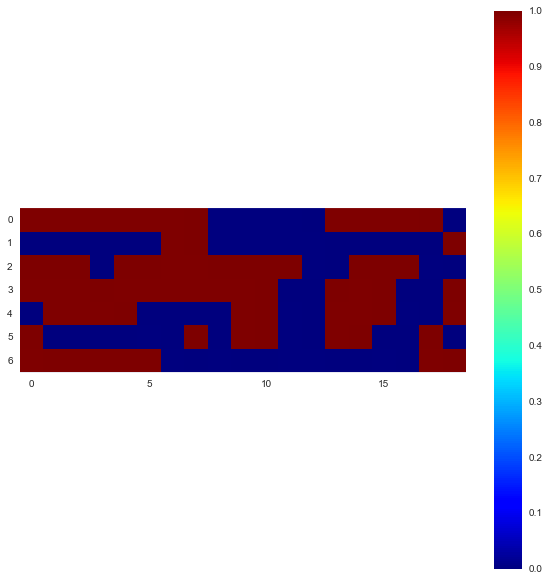

In [29]:
plt.figure(figsize=(10,10))
index = 0
for key in anova_feature_dict.keys():
    index += 1
#     plt.subplot(len(anova_feature_dict.keys()), 1, index)
    spect = anova_feature_dict[key] <= 0.5
    plt.imshow(spect, cmap='jet', interpolation='none')
    plt.colorbar()
    plt.grid(False)
    break
#     pause()
#     plt.tight_layout()

## Low, Middle, High Frequency Ranges Analysis
Second: Electrode raw data = channels and frequency bands identify first n PC for each wordpair and then compute distance


In [2]:
######## Get list of files (.mat) we want to work with ########
filedir = '../condensed_data/freq_probeTovocal_binned/'
files = []

for file in os.listdir(filedir):
    if file.endswith('.mat'):
        files.append(file)

# Load in events struct to find correct events
eventsDir = '../NIH034/behavioral/paRemap/' + 'events.mat'

events = scipy.io.loadmat(eventsDir)
events = events['events']

# get correct events
correctIndices = events['isCorrect'] == 1
events = events[correctIndices]

print "This is the length of the events struct with only correct responses: ", len(events)
        
print "There are ", len(files), " files inside our directory"
print "This should match the number of channels."

This is the length of the events struct with only correct responses:  1431
There are  96  files inside our directory
This should match the number of channels.


In [7]:
################## LOOPING THROUGH EACH CHANNEL ##################
feature_dict = {} # the dict to hold the feature matrix for each channel

for f in range(0, len(files)):
    #################### Set up data from the channel's mat file ####################
    # Go through each .mat file
    mat_file = filedir + files[f]

    data = scipy.io.loadmat(mat_file)
    data = data['data']


    ## 01: reformat unique trigger types
    uniqueTrigTypes = data['uniqueTrigType'][0][0][0]
    buff = []
    for trig in uniqueTrigTypes:
        buff.append(str(trig[0]))
    uniqueTrigTypes = buff

    ## 02: reformat trigger types
    trigTypes = data['trigType'][0][0][0]
    buff = []
    for trig in trigTypes:
        buff.append(str(trig[0]))
    trigTypes = buff

    ## 03: get channel number
    chanNum = data['chanNum'][0][0][0][0]

    ## 04: get channel string
    chanStr = data['chanStr'][0][0][0]

    ## 05: get power matrix Z is a #events X #freq. bands
    matrix = data['powerMatZ'][0][0]

    ## 06: get freq band ticks and ylabels
    freqBandYtick = data['freqBandYtick'][0][0][0]
    freqBandYlabel = data['freqBandYlabel'][0][0][0]
    buff = []
    for freq in freqBandYlabel:
        buff.append(str(freq[0]))
    freqBandYlabel = buff

    #################### Getting those events and the corresonding averaged powermat  ####################
    ## Get events of interest
    TRIGGER_TYPES = uniqueTrigTypes
    probeWords = events['probeWord']
    targetWords = events['targetWord']

    # number of frequency bins
    num_freqs = len(freqBandYtick) - 1
    # total number of "data centers"
#     num_features = len(TRIGGER_TYPES)*len(tempTargets)
    features = {}
    
    for i in range(0,len(TRIGGER_TYPES)): # LOOP THRU EACH PROBEWORD
        current_trig = TRIGGER_TYPES[i]

        ## 01: get indices of the current trigger and get those events
        tempInd = events['probeWord'] == current_trig
        tempEvents = events[tempInd]
        tempTargets = np.unique(tempEvents['targetWord'])
    
        ## 02: go through each target word for this probeword
        for j in range(0, len(tempTargets)):
            targetWord = tempTargets[j][0] # set target word
    
            # get the indices of the events we want probe/target match
            eventInd = events['probeWord'] == current_trig
            eventInd2 = events['targetWord'] == targetWord
#             eventInd = np.array([(tup) for tup in zip(eventInd, eventInd2)])
            
            eventInd = eventInd&eventInd2
            
            # get the matrix we want and average across all events 
            thisMat = np.mean(matrix[eventInd,:], axis=0)
            # -> a 7x1 vector that represents this match for this channel 
            
            feature_key = str(current_trig) + '_' + str(targetWord)
            
            features[feature_key] = thisMat
            # clear vars
            eventInd2 = 0
    
    # turn features into np array and append to a dict of the features
#     features = np.array(features)
    feature_dict[str(f+1)] = features

print "The final feature dictionary will have features from the following channels: ", sorted(feature_dict.keys())

The final feature dictionary will have features from the following channels:  ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96']


In [8]:
### Concatenate a dict of all feature match/pairs
# match_features = {}
match_features = dict.fromkeys(feature_dict['1'].keys())
for key in match_features.keys():
    match_features[key] = []


# loop through each feature_dict keys (channel)
channels = feature_dict.keys()
for chan in channels:
    feature_channel = feature_dict[chan] # get the specific feature for that channel
    
    # loop through each match pair
    match_pair = feature_channel.keys()
    for pair in match_pair:
        # get feature for this match/pair
        feature = feature_channel[pair]
        
        match_features[pair].append(feature)
        
# convert everything into np arrays
for key in match_features.keys():
    match_features[key] = np.array(match_features[key])

print "These are the keys in our dict: ", match_features.keys(), "\n"
print "this is the shape of our new feature matrix "
print "for a certain word pair match: ", match_features[pair].shape

These are the keys in our dict:  ['JUICE_GLASS', 'BRICK_JUICE', 'CLOCK_GLASS', 'GLASS_CLOCK', 'GLASS_JUICE', 'BRICK_CLOCK', 'GLASS_PANTS', 'PANTS_BRICK', 'PANTS_GLASS', 'JUICE_BRICK', 'BRICK_PANTS', 'CLOCK_BRICK'] 

this is the shape of our new feature matrix 
for a certain word pair match:  (96, 7)


In [9]:
# Now for each match feature, compute centroid and compute distances from all centroids pairwise
matches = match_features.keys()
centroids_dict = {}

freqBin_dict = {}
for match in matches:
    freqBin_dict[match] = [0, 0, 0]
    freqBin_dict[match][0] = np.mean(match_features[match][:,0:2], axis=1)
    freqBin_dict[match][1] = np.mean(match_features[match][:,2:4], axis=1)
    freqBin_dict[match][2] = np.mean(match_features[match][:,4:7], axis=1)
#     freqBin_dict[match] = np.mean(match_features[match], axis=1)
    freqBin_dict[match] = np.array(freqBin_dict[match]).T
    
print "New 96 channels X 3 frequency bins: ", freqBin_dict[match].shape



New 96 channels X 3 frequency bins:  (96, 3)


The array of centroids we have are of shape:  (12, 288)


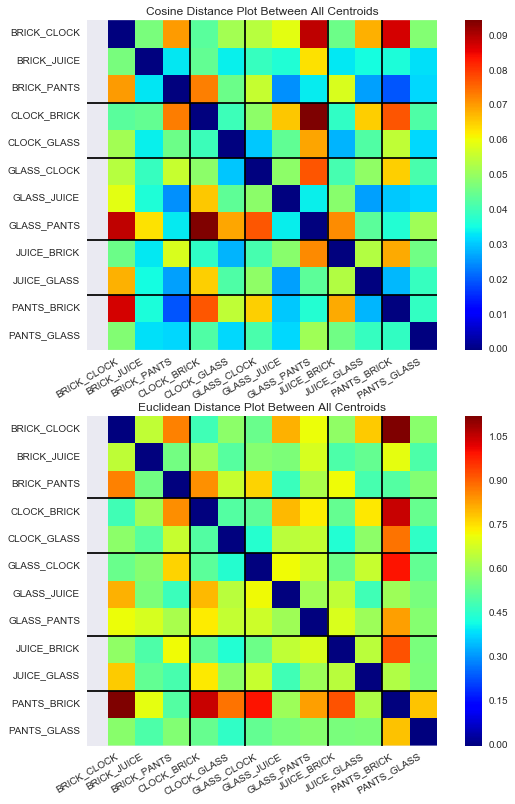

In [10]:
###################### GET ALL CENTROIDS WITHOUT AVERAGING ACROSS CHANNELS ####################
# Now for each match feature, compute centroid and compute distances from all centroids pairwise
matches = freqBin_dict.keys()
centroids_dict = {}

# loop through all match/probes
for match in matches:
#     print match
#     print match_features[match].shape
    centroid = np.ndarray.flatten(freqBin_dict[match])
    centroids_dict[match] = centroid
    
# Resort the centroids based on probeword
centroids = []
sortkeys = sorted(centroids_dict.keys())
for key in sortkeys:
    centroids.append(centroids_dict[key])
    
centroids = np.array(centroids)
print "The array of centroids we have are of shape: ", centroids.shape
########### centroids is an array of the 12 unique trigger types X dimensional feature ###########

# compute distance matrix
distances = scipy.spatial.distance.pdist(centroids, metric='cosine')
distances = scipy.spatial.distance.squareform(distances)

# Plot the distances matrix
fig = plt.figure(figsize=(10,13))
plt.subplot(211)
plt.imshow(distances, cmap=plt.get_cmap('jet'), interpolation='none')
plt.title("Cosine Distance Plot Between All Centroids")
plt.yticks(np.arange(0,12, 1), sortkeys)
plt.xticks(np.arange(-1.25,12-1.25, 1), sortkeys, rotation='30')
ax = plt.gca()
yline = [2.5, 4.5, 7.5, 9.5]
for i in range(0, len(yline)):
    plt.axhline(y=yline[i], color='k')
    plt.axvline(x=yline[i], color='k')
ax.grid(False)
plt.colorbar()

# compute distance matrix
distances = scipy.spatial.distance.pdist(centroids, metric='euclidean')
distances = scipy.spatial.distance.squareform(distances)

plt.subplot(212)
plt.imshow(distances, cmap=plt.get_cmap('jet'), interpolation='none')
plt.title("Euclidean Distance Plot Between All Centroids")
plt.yticks(np.arange(0,12, 1), sortkeys)
plt.xticks(np.arange(-1.25,12-1.25, 1), sortkeys, rotation='30')
ax = plt.gca()
xmin = ax.get_xlim

yline = [2.5, 4.5, 7.5, 9.5]
for i in range(0, len(yline)):
    plt.axhline(y=yline[i], color='k')
    plt.axvline(x=yline[i], color='k')
ax.grid(False)
plt.colorbar()



## Probewords only

In [11]:
################## LOOPING THROUGH EACH CHANNEL ##################
probe_dict = {} # the dict to hold the feature matrix for each channel

for f in range(0, len(files)):
    #################### Set up data from the channel's mat file ####################
    # Go through each .mat file
    mat_file = filedir + files[f]

    data = scipy.io.loadmat(mat_file)
    data = data['data']

    ## 01: reformat unique trigger types
    uniqueTrigTypes = data['uniqueTrigType'][0][0][0]
    buff = []
    for trig in uniqueTrigTypes:
        buff.append(str(trig[0]))
    uniqueTrigTypes = buff

    ## 02: reformat trigger types
    trigTypes = data['trigType'][0][0][0]
    buff = []
    for trig in trigTypes:
        buff.append(str(trig[0]))
    trigTypes = buff

    ## 05: get power matrix Z is a #events X #freq. bands
    matrix = data['powerMatZ'][0][0]

    ########### Getting those events and the corresonding averaged powermat  ################
    ## Get events of interest
    TRIGGER_TYPES = uniqueTrigTypes
    probeWords = events['probeWord']
    features = {}
    
    for i in range(0,len(TRIGGER_TYPES)): # LOOP THRU EACH PROBEWORD
        current_trig = TRIGGER_TYPES[i]

        ## 01: get indices of the current trigger and get those events
        tempInd = events['probeWord'] == current_trig
        tempEvents = events[tempInd]
        
#         # average across events
#         thisMat = np.mean(matrix[tempInd,:,], axis=0)
        thisMat = matrix[tempInd,:]
        features[current_trig] = thisMat
        
    probe_dict[str(f+1)] = features

print "The final feature dictionary will have features from "
print "the following channels: ", sorted(probe_dict.keys())

The final feature dictionary will have features from 
the following channels:  ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96']


In [34]:
### Concatenate a dict of all feature match/pairs
# match_features = {}
match_features = dict.fromkeys(probe_dict['1'].keys())
for key in match_features.keys():
    match_features[key] = []
print "These are the keys in our dict: ", match_features.keys(), "\n"

# loop through each feature_dict keys (channel)
channels = probe_dict.keys()
for chan in channels:
    feature_channel = probe_dict[chan] # get the specific feature for that channel
    
    # loop through each match pair
    match_pair = feature_channel.keys()
    for pair in match_pair:
        # get feature for this match/pair
        feature = np.mean(feature_channel[pair], axis=0)
#         feature = feature_channel[pair]
        match_features[pair].append(np.ndarray.flatten(feature))

# convert everything into np arrays
for key in match_features.keys():
    match_features[key] = np.array(match_features[key])

print "this is the shape of our new feature matrix "
print "for a certain word pair match: ", match_features[pair].shape

These are the keys in our dict:  ['CLOCK', 'JUICE', 'BRICK', 'PANTS', 'GLASS'] 

this is the shape of our new feature matrix 
for a certain word pair match:  (96, 7)


The array of centroids we have are of shape:  (5, 672)


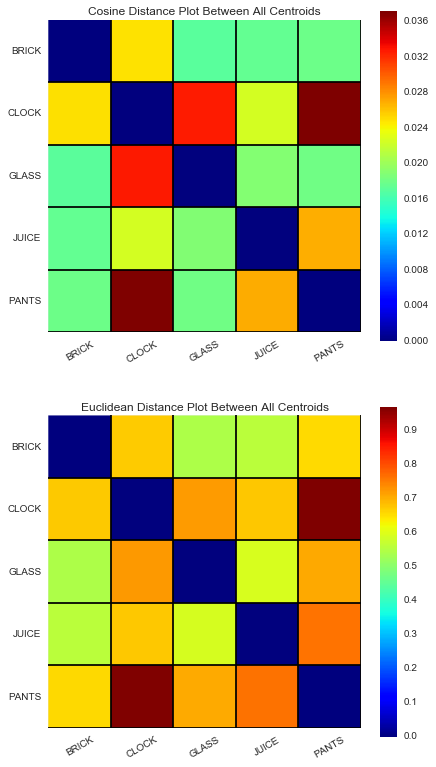

In [35]:
###################### GET ALL CENTROIDS WITHOUT AVERAGING ACROSS CHANNELS ####################
# Now for each match feature, compute centroid and compute distances from all centroids pairwise
matches = match_features.keys()
centroids_dict = {}

# loop through all match/probes
for match in matches:
#     print match
#     print match_features[match].shape
    centroid = np.ndarray.flatten(match_features[match])
    centroids_dict[match] = centroid

# Resort the centroids based on probeword
centroids = []
sortkeys = sorted(centroids_dict.keys())
for key in sortkeys:
    centroids.append(centroids_dict[key])
    
centroids = np.array(centroids)
print "The array of centroids we have are of shape: ", centroids.shape
########### centroids is an array of the 12 unique trigger types X dimensional feature ###########

# compute distance matrix
distances = scipy.spatial.distance.pdist(centroids, metric='cosine')
distances = scipy.spatial.distance.squareform(distances)

# Plot the distances matrix
fig = plt.figure(figsize=(7,13))
plt.subplot(211)
plt.imshow(distances, cmap=plt.get_cmap('jet'), interpolation='none')
plt.title("Cosine Distance Plot Between All Centroids")
plt.yticks(np.arange(0,5, 1), sortkeys)
plt.xticks(np.arange(0,5, 1), sortkeys, rotation='30')
ax = plt.gca()
yline = [0.5, 1.5, 2.5, 3.5, 4.5]
for i in range(0, len(yline)):
    plt.axhline(y=yline[i], color='k')
    plt.axvline(x=yline[i], color='k')
ax.grid(False)
plt.colorbar()

# compute distance matrix
distances = scipy.spatial.distance.pdist(centroids, metric='euclidean')
distances = scipy.spatial.distance.squareform(distances)

plt.subplot(212)
plt.imshow(distances, cmap=plt.get_cmap('jet'), interpolation='none')
plt.title("Euclidean Distance Plot Between All Centroids")
plt.yticks(np.arange(0,5, 1), sortkeys)
plt.xticks(np.arange(0,5, 1), sortkeys, rotation='30')
ax = plt.gca()
yline = [0.5, 1.5, 2.5, 3.5, 4.5]
for i in range(0, len(yline)):
    plt.axhline(y=yline[i], color='k')
    plt.axvline(x=yline[i], color='k')
ax.grid(False)
plt.colorbar()
# font = {
#         'size'   : 10}

# matplotlib.rc('font', **font)
# print "An example of a feature centroid: \n", centroids[0]